<function matplotlib.pyplot.show(close=None, block=None)>

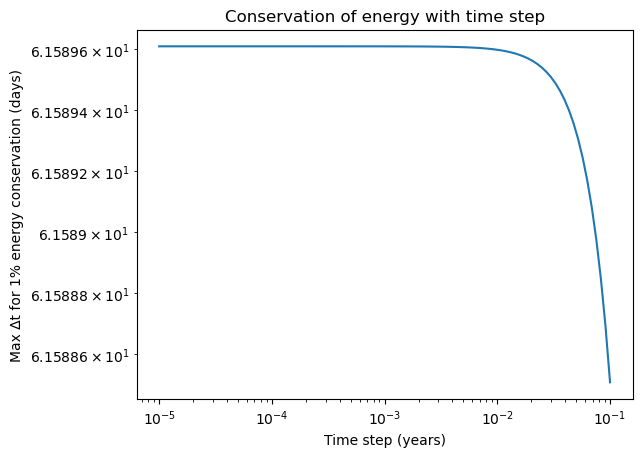

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
GM = 4 * np.pi**2  # Gravitational constant * Mass of sun [AU^3/yr^2]
m = 2.2e14       # Mass of Halley's comet
q = 0.587        # Aphelion distance in AU
e = 0.967        # Eccentricity
a = q / (1 - e)  # Semi-major axis
v_perihelion = np.sqrt(GM*(2/q - 1/(a)))  # Velocity at perihelion

# Initial conditions
r0 = 35           # Initial radial distance in AU
v0 = np.sqrt(GM*(2/q + 1/(a)))  # Initial velocity at aphelion

# Time step range to test. Start is 1e-5, the stop is 1e-1, and there are 100 values in the array.
tau_range = np.logspace(-5, -1, 100)

# Arrays to store results
E = np.zeros_like(tau_range)
timesteps = np.zeros_like(tau_range)

# Loop over time step range
for i, tau in enumerate(tau_range):
    # Initialize variables
    r = r0
    v = v0
    time = 0
    E0 = -GM*m / (2*a)
    
    # Loop over one orbit
    while time < 76.03:
        accel = -GM / r**2
        v += tau * accel
        r += tau * v
        time += tau
        E1 = 0.5*m*v**2 - GM*m / r
        if abs(E1 - E0) / abs(E0) > 0.01:
            break
    # Store results
    E[i] = abs(E1 - E0) / abs(E0)
    timesteps[i] = tau

# Plot results
plt.loglog(timesteps, E)
plt.xlabel('Time step (years)')
plt.ylabel('Max ∆t for 1% energy conservation (days)')
plt.title('Conservation of energy with time step')
plt.show